In [91]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

In [92]:
phone_data = pd.read_csv("./mobile_price.csv")
# phone_data = pd.read_csv("./spambase.csv")
phone_data.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [93]:
phone_input=phone_data.iloc[:,:-1]
phone_target=phone_data.iloc[:,-1]

In [94]:
phone_train_input, phone_test_input, phone_train_target, phone_test_target = train_test_split(phone_input, phone_target,random_state = 42, test_size=0.3)
ss=StandardScaler()
ss.fit(phone_input)
phone_train_input = ss.transform(phone_train_input)
phone_test_input = ss.transform(phone_test_input)

In [99]:
nn = MLPClassifier(max_iter=300,random_state=42)
param_names = ['learning_rate_init','hidden_layer_sizes']#,
param_ranges = [np.linspace(0.001, 0.01,10), range(2,10,1)]#,
for i in range(len(param_names)):
    train_score, test_score = validation_curve(nn, phone_train_input,phone_train_target, param_name=param_names[i], param_range=param_ranges[i],cv=4)
    plt.figure()
    plt.plot(param_ranges[i], np.mean(train_score, axis=1),label='Train Score')
    plt.plot(param_ranges[i], np.mean(test_score, axis=1), label='CV Score')
    plt.xlabel(param_names[i])
    plt.ylabel('Score')
    plt.legend(loc='best')

In [ ]:
param_grid = dict(zip(param_names,param_ranges))
grid = GridSearchCV(nn, param_grid, n_jobs= -1, cv=4)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    grid.fit(phone_train_input, phone_train_target)

{'hidden_layer_sizes': range(2, 10), 'learning_rate_init': 0.003}


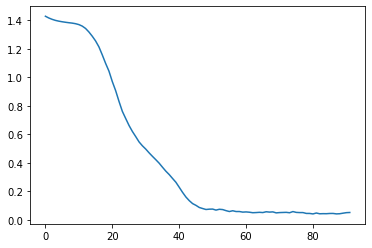

In [97]:
print(grid.best_params_) 
nn=grid.best_estimator_
loss = nn.loss_curve_
plt.figure()
plt.plot(loss)
plt.show()

In [ ]:
nn.hidden_layer_sizes=(16,8)
train_size, train_score, test_score = learning_curve(nn,phone_train_input, phone_train_target, train_sizes=np.linspace(0.1,1,10),cv=4)
plt.figure()
plt.plot(np.linspace(0.1,1,10)*100,np.mean(train_score,axis=1), label="Train Score")
plt.plot(np.linspace(0.1,1,10)*100,np.mean(test_score,axis=1), label="CV Score")
plt.legend(loc='best')
plt.xlabel("Trainning example(%)")
plt.ylabel("Score")
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'hidden_layer'

0.7985714285714286
0.7883333333333333


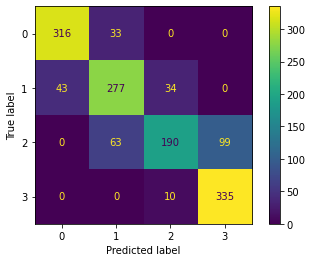

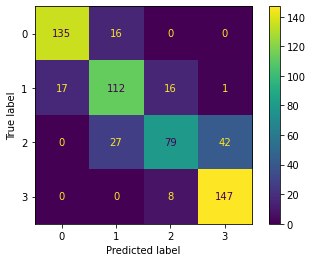

In [ ]:
metrics.plot_confusion_matrix(nn, phone_train_input, phone_train_target)
metrics.plot_confusion_matrix(nn,phone_test_input, phone_test_target)
print(nn.score(phone_train_input, phone_train_target))
print(nn.score(phone_test_input, phone_test_target))

MLPClassifier(hidden_layer_sizes=2, random_state=42)


0.6966666666666667